In [1]:
import torch
import matplotlib.pyplot as plt 
import torch
import torchvision
import torchvision.transforms as transforms
import tensorboardX

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

tb_writer = tensorboardX.SummaryWriter('storage/2fcmnistV3')

batch_size=128

cuda:0


In [3]:
def get_accuracy(batch=False):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs.to(device))
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
           
            if batch:
                break

    return (100 * correct / total)

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data/', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data/', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = list(range(10))
n_classes = len(classes)

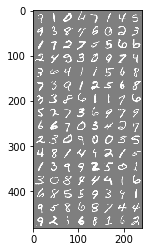

    9     1     0     4


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Conv2d(1, 32, kernel_size=3, stride=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*13*13, 100)
        self.fc2 = nn.Linear(100, n_classes)
        self.ReLU = nn.ReLU()
        
        self.last_hidden = None

    def forward(self, x):
        x = self.conv(x)
        x = self.ReLU(x)
        x = self.pool(x)
        x = x.view(-1, 32*13*13)
        x = self.ReLU(self.fc1(x))
        x = self.fc2(x)
        return x

    def get_last_hidden(self,x):
        x = self.pool(self.ReLU(self.conv(x)))
        x = x.view(-1, 32*13*13)
        x = self.ReLU(self.fc1(x))
        return x 
    
net = Net()
net.to(device)

Net(
  (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=5408, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (ReLU): ReLU()
)

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
step = 0 

for epoch in range(10):  # loop over the dataset multiple times
    
    log_interval = 100

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (i+1) % log_interval == 0:
            
            acc = get_accuracy()
            tb_writer.add_scalar("step_loss", loss, step)
            tb_writer.add_scalar("accuracy", acc, step)
            
            print('[%d, %5d] loss: %.3f \t acc:%.3f' %
                  (epoch + 1, i + 1, running_loss / 1000, acc))
            running_loss = 0.0

        step += 1 



print('Finished Training')

[1,   100] loss: 0.216 	 acc:68.780
[1,   200] loss: 0.161 	 acc:81.450
[1,   300] loss: 0.088 	 acc:86.240
[1,   400] loss: 0.059 	 acc:87.770
[2,   100] loss: 0.043 	 acc:89.180
[2,   200] loss: 0.041 	 acc:89.860
[2,   300] loss: 0.037 	 acc:90.070
[2,   400] loss: 0.035 	 acc:90.390
[3,   100] loss: 0.034 	 acc:91.040
[3,   200] loss: 0.031 	 acc:91.240
[3,   300] loss: 0.033 	 acc:91.180
[3,   400] loss: 0.031 	 acc:91.640
[4,   100] loss: 0.030 	 acc:92.050
[4,   200] loss: 0.029 	 acc:92.110
[4,   300] loss: 0.029 	 acc:92.080
[4,   400] loss: 0.028 	 acc:92.350
[5,   100] loss: 0.028 	 acc:92.570
[5,   200] loss: 0.025 	 acc:92.640
[5,   300] loss: 0.027 	 acc:92.770
[5,   400] loss: 0.026 	 acc:92.910
[6,   100] loss: 0.025 	 acc:93.140
[6,   200] loss: 0.024 	 acc:93.340
[6,   300] loss: 0.024 	 acc:93.450
[6,   400] loss: 0.025 	 acc:93.440
[7,   100] loss: 0.024 	 acc:93.680
[7,   200] loss: 0.023 	 acc:93.610
[7,   300] loss: 0.022 	 acc:93.940
[7,   400] loss: 0.021 	 acc

In [9]:
PATH = './fc2_mnist.pth'
torch.save(net.state_dict(), PATH)

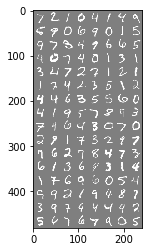

GroundTruth:      7     2     1     0


In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:      7     2     1     0


In [ ]:
get_accuracy()